In [1]:
'''
*****************************************************************************************************************************************
*****************************************************************************************************************************************
* Author             : Anjana Tiha
* Author Details     : Masters of Science, Computer Science, University of Memphis, Memphis, Tennessee, USA (May 2018)
*****************************************************************************************************************************************
*****************************************************************************************************************************************
* Project Name       : Toxic Comment Classification Challenge - Kaggle Classification and Regression Module
* Description        : Machine Learning (Supervised Learning/ Classification/ Predictive Algorithm) for identifying toxic comments.
* Solution           : Using TFIDF Vector and sentence, word and charcacter level analysis following a recent 2018 AAAI conference paper.
* Input              : Collection of 159000 comments
* Output             : classifying toxic/hateful comment
* Start Date         : 07.04.2018
* Last Update        : 
* Tools Requirement  : Anaconda/PyCharm, Python
* Comments           : Please use Anaconda editor for visualization and convenience.
* Version History    : 1.0.0.0
* Current Version    : 1.0.0.0
*****************************************************************************************************************************************
*****************************************************************************************************************************************

'''


'\n*****************************************************************************************************************************************\n*****************************************************************************************************************************************\n* Author             : Anjana Tiha\n* Author Details     : Masters of Science, Computer Science, University of Memphis, Memphis, Tennessee, USA (May 2018)\n*****************************************************************************************************************************************\n*****************************************************************************************************************************************\n* Project Name       : Toxic Comment Classification Challenge - Kaggle Classification and Regression Module\n* Description        : Machine Learning (Supervised Learning/ Classification/ Predictive Algorithm) for identifying toxic comments.\n* Solution           : Using TFIDF Vector a

In [2]:
'''
Followed the following paper:
Paper Summray:
Title:    Anatomy of Online Hate: Developing a Taxonomy and Machine Learning 
          Models for Identifying and Classifying Hate in Online News Media
Authors:  Joni Salminen,*†§ Hind Almerekhi,*Milica Milenković, Soon-gyo Jung,*Jisun An,*Haewoon Kwak,*,Bernard J. Jansen*
          Qatar Computing Research Institute, Hamad Bin Khalifa University †
          Turku School of Economics at the University of Turku
          Independent Researcher
'''

'\nFollowed the following paper:\nPaper Summray:\nTitle:    Anatomy of Online Hate: Developing a Taxonomy and Machine Learning \n          Models for Identifying and Classifying Hate in Online News Media\nAuthors:  Joni Salminen,*†§ Hind Almerekhi,*Milica Milenković, Soon-gyo Jung,*Jisun An,*Haewoon Kwak,*,Bernard J. Jansen*\n          Qatar Computing Research Institute, Hamad Bin Khalifa University †\n          Turku School of Economics at the University of Turku\n          Independent Researcher\n'

In [ ]:
'''
*****************************************************************************************************************************************
Classify comments on categories - 
toxic, severe_toxic, obscene, threat, insult, identity_hate, any, none
*****************************************************************************************************************************************
*****************************************************************************************************************************************
Procedure:
*****************************************************************************************************************************************
1. Build pipelines for machine learning model training for reading file, creating training testing dataset, preprocessing 
   (cleaning text, tokenization, single character count, url count, modal count, non alpha mid character), 
   extracting features, and training and evaluation in grid search approach for mutiple models.
2. Preprocessing unit replaced non standard input features with default value.
3. Build feature class for following features: 
    - Count of exclamations, periods, question marks, punctuation, special characters, repeated punctuation, and quotes 
      in each comment.
    - Count of single-char. tokens in each comment.
    - Count of URLs in each comment.
    - Length of the comment (in chars. and in tokens).
    - Total number of capital letters in the tokens.
    - Total number of emoticons in each comment.
    - Total number of modal words in each comment.
    - The modal words that were used are: can, could, may, might, must, will, would, and should.
    - Total number of tokens with non-alphabetic characters in the middle.
4. Build model training pipeline for both classification and regression
*****************************************************************************************************************************************
*****************************************************************************************************************************************

'''

In [3]:
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
import string
from string import punctuation
import re
from tokenize import tokenize
import nltk, re, time
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn import metrics
import gc

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
class File:
    def __init__(self, train_X_file, train_Y_file, test_X_file, test_Y_file):
        if train_X_file:
            self.train_X = pd.read_csv(train_X_file)
        if train_Y_file:
            self.train_Y = pd.read_csv(train_Y_file)
        else:
            self.train_Y = None
        if test_X_file:
            self.test_X = pd.read_csv(test_X_file)
        if test_Y_file:
            self.test_Y = pd.read_csv(test_Y_file)
            
    def get_content(self):
        return self.train_X, self.train_Y, self.test_X, self.test_Y

In [5]:
class Data:
    def __init__(self, train_X, train_Y, test_X, test_Y, train_test, train_XY, test_XY, targets):
        self.train_X = train_X
        self.test_X = test_X
     
        self.train_Y = None
        self.test_Y = None
        
        self.feature_cols = None
        self.targets = targets
        
        if train_XY:
            self.train_Y = self.train_X[self.targets]
            self.train_X.drop(columns=self.targets, inplace=True)
                        
        else:
            self.train_Y = self.train_Y
            
        if test_XY:
            self.test_Y = self.test_X[targets]        
            self.test_X.drop(columns=targets, inplace=True)
        else:
            self.test_Y = test_Y
        
        self.train_X.drop(columns='id', inplace=True)
        self.test_X.drop(columns='id', inplace=True)

    def set_feature_cols(self, feature_cols):
        if self.feature_cols:
            self.feature_cols.append(feature_cols)
        else: self.feature_cols = feature_cols
            
    def remove_feature_cols(self, feature_cols):
        if self.feature_cols:
            self.feature_cols.remove(feature_cols)
        else: self.feature_cols = None
            
    
    def fill_columns_selected(self, columns_names, columns_val, inplace=True):
        for cols in columns_names:
            self.train_X[cols].fillna(columns_val, inplace=inpl)
            self.test_X[cols].fillna(columns_val, inplace=inpl)
            
            
    def fill_columns(self, val, inpl=True):
        self.train_X.fillna(val, inplace=inpl)
        self.test_X.fillna(val, inplace=inpl)
        
    
    def get_data(self):
        return self.train_X, self.train_Y, self.test_X, self.test_Y
            
            

In [6]:
class Preprocess:
    def __init__(self):
        pass
    def clean_text(self, text, alpha=True, punc=False, case_active=False, remove_stopwords=True):
        if alpha:
            text  = re.sub(r"[^a-z]", " ", text)
        if case_active==False:
            text  = text .lower()
        if punc==False:
            text  = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            self.text = ' '.join([word for word in text.split() if word not in cached_stopwords])
        text = re.sub(r" +", " ", text)
        text = text.strip()
        text = text .split()
        return text   

    
    def tokenize(self, text, alpha=True, punc=False, case_active=False, remove_stopwords=True):
        if alpha:
            text = re.sub(r"[^a-z]", " ", text)
        if case_active==False:
            text = text.lower()
        if punc==False:
            text = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            text = ' '.join([word for word in text.split() if word not in cached_stopwords])
        text = re.sub(r" +", " ", text)
        text = text.strip()
        text = text.split()
        return text 


    def single_char_cnt(self, text, alpha=False, punc=False, remove_stopwords=True):
        if alpha:
            text = re.sub(r"[^a-z]", " ", text)
        if punc==False:
            text = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            text = ' '.join([word for word in text.split() if word not in cached_stopwords])

        text = re.sub(r" +", " ", text)
        text = text.strip()
        text = text.split()

        c=0
        for tok in text:
            if len(tok.strip())==1: c+=1
        return  c

    
    def find_urls(self, text):
        return re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', text)


    def count_modals(self, text):
        modals = ['can', 'could', 'may', 'might', 'must', 'will', 'would', 'should']

        toks = text.split(' ')

        c=0
        for tok in toks:
            if tok in modals: c+=1
        return c

    
    def non_alpha_mid(self, text, alpha=False, punc=False, remove_stopwords=True):
        text = re.sub(r" +", " ", text)
        if punc==False:
            text = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            text = ''.join([word for word in text if word not in cached_stopwords])

        text = text.split()

        c=0
        for tok in text:
            m=0
            for ch in tok:
                if ch.isalpha()==0: m+=1
            if (m>1 and len(tok)>1) or (m>=1): c+=1
        return c

In [7]:
class Features:    
    def __init__(self, train_X, test_X, columns_text):
        self.train_X = train_X
        self.test_X = test_X
        self.columns_text = columns_text
        
        self.train_X_features = []
        self.test_X_features = []
        self.train_X_tfidf = None
        self.test_X_tfidf = None
        
        
    def get_features_X(self, X, features):
        count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
        prep_obj = Preprocess()
        
        features = []
        try:
            for col in self.columns_text:
                length=X[col].size
                
                i=0
                features_col = []
                for line in range(0, length):
                    counts = []
                
                    text = X[col][line]
                    
                    counts.append(text.count("!"))
                    counts.append(text.count("?"))
                    counts.append(text.count("."))
                    counts.append(count(text,set(string.punctuation)))
                    counts.append(len(re.findall('[''""]', text)))
                    
                    counts.append(prep_obj.single_char_cnt(text, alpha=False, punc=False, remove_stopwords=False))
                    
                    counts.append(len(prep_obj.find_urls(text)))
                    
                    counts.append(len(text))
                    counts.append(len(text.split()))
                    counts.append(sum(1 for c in text if c.isupper()))

                    counts.append(prep_obj.count_modals(text))
                    
                    counts.append(len(re.findall(r'[\U0001f600-\U0001f650]', text)))
                    counts.append(prep_obj.non_alpha_mid(text, alpha=False, punc=False, remove_stopwords=False))
                    
                    features_col.append(counts)
                    i+=1
#                     if i%10000==0: print(i)
                
    
                features_col = np.array(features_col, dtype='int64')
                features.append(features_col)
        except:
            print("Error:", line)
                
        return features
    
    
    def get_tfidf_features(self, tfidf, column):
        self.train_X_tfidf = tfidf.fit_transform(train[column])
        self.test_X_tfidf = tfidf.transform(test[column])
        
        return self.train_X_tfidf, self.test_X_tfidf
    
    
    def get_features(self):
        self.train_X_features = self.get_features_X(self.train_X, self.columns_text)
        self.test_X_features = self.get_features_X(self.test_X, self.columns_text)
        
        return self.train_X_features, self.test_X_features 
    

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


class Splitter:
    def __init__(self, splitter_name, n_splits, test_size, random_state):
        self.splitter = None
        if splitter_name == 'KFold':
            self.splitter = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        elif splitter_name == 'StratifiedShuffleSplit':
            self.splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
            
    def get_splitter(self):
        return self.splitter
    
    


In [9]:
# classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, RandomForestClassifier, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# regressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomTreesEmbedding, RandomForestRegressor, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ARDRegression, LinearRegression, LogisticRegression, LogisticRegressionCV, logistic_regression_path, HuberRegressor, PassiveAggressiveRegressor, RandomizedLogisticRegression, RANSACRegressor, SGDRegressor, TheilSenRegressor
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsRegressor, NearestNeighbors, RadiusNeighborsRegressor
from sklearn.neural_network import BernoulliRBM, MLPRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor


class Model:
    def __init__(self, model_type):
        if model_type == 'Classification':
            self.models = {
                "AdaBoostClassifier": AdaBoostClassifier(),
                "BernoulliNB": BernoulliNB(),
            #     "BernoulliRBM": BernoulliRBM(),
                "DecisionTreeClassifier": DecisionTreeClassifier(),
                "ExtraTreesClassifier": ExtraTreesClassifier(),
            #     "GaussianMixture": GaussianMixture(),
            #     "GaussianNB": GaussianNB(),
            #     "GaussianProcessClassifier": GaussianProcessClassifier(),
                "GradientBoostingClassifier": GradientBoostingClassifier(),
            #     "KDTree": KDTree(),
            #     "KNeighborsClassifier": KNeighborsClassifier(3),
                "LogisticRegression": LogisticRegression(),
                "LinearSVC": LinearSVC(),
                "MLPClassifier": MLPClassifier(),
                "MultinomialNB": MultinomialNB(),
            #     "NearestNeighbors": NearestNeighbors(),
            #     "NuSVC": NuSVC(),
                "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
                "RandomForestClassifier": RandomForestClassifier(),
#                 "SVC Linear": SVC(kernel="linear", C=0.025),
#                 "SVC radial": SVC(kernel="radial", C=0.025),
#                 "SVC": SVC(),
#                 "SVC Gamma": SVC(gamma=2, C=1)
            #     VotingClassifier: VotingClassifier(),
            }
        elif model_type == 'Regression':
            self.models  = {
                "AdaBoostRegressor": AdaBoostRegressor(),
            #     "ARDRegression": ARDRegression(),
                "BaggingRegressor": BaggingRegressor(),
            #     "BernoulliRBM": BernoulliRBM(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "ExtraTreesRegressor": ExtraTreesRegressor(),
                "ExtraTreeRegressor": ExtraTreeRegressor(),
            #     "GaussianMixture": GaussianMixture(),
            #     "GaussianNB": GaussianNB(),
                "GaussianProcessRegressor": GaussianProcessRegressor(),
                "GradientBoostingRegressor": GradientBoostingRegressor(),
                "HuberRegressor": HuberRegressor(),
            #     "IsotonicRegression": IsotonicRegression(),
                "KernelRidge": KernelRidge(),
            #     "KDTree": KDTree(),
            #     "KNeighborsRegressor": KNeighborsRegressor(),
            #     "LinearRegression": LinearRegression(), 
                "LogisticRegression": LogisticRegression(),
                "LogisticRegressionCV": LogisticRegressionCV(),
            #     "logistic_regression_path": logistic_regression_path(),
                "LinearSVR": LinearSVR(),
                "MLPRegressor": MLPRegressor(),
            #     "MultinomialNB": MultinomialNB(),
                "NuSVR": NuSVR(),
                "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
            #     "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
                "RadiusNeighborsRegressor": RadiusNeighborsRegressor(),
                "RandomForestRegressor": RandomForestRegressor(),
                "RandomizedLogisticRegression": RandomizedLogisticRegression(),
                "RANSACRegressor": RANSACRegressor(),
                "SGDRegressor": SGDRegressor(),
                "SVR": SVR(),
                "TheilSenRegressor": TheilSenRegressor(),
            }
    
    def get_models(self):
        return self.models
            


In [10]:
from sklearn import metrics

class ModelClassification:
    def __init__(self, train_X, train_Y, test_X, test_Y, targets, splitter, models, average, report, details):
        
        self.train_X = train_X
        self.train_Y = train_Y
        
        self.test_X = test_X
        self.test_Y = test_Y
        
        self.targets = targets
        
        self.splitter = splitter
        
        self.models = models
        
        self.average = average
        
        self.report = report
        self.details = details
        
        self.accuracy = 0
        self.f1 = 0
        self.precision = 0
        self.recall = 0
    
    
    def reset_score(self):
        self.accuracy = 0
        self.f1 = 0
        self.precision = 0
        self.recall = 0
            
    def model_evaluation(self, model, target):
        self.reset_score()
 
        if self.report:
            print("Model Description:")
            print(model)
            print("-"*100,"\n")
            
        train_Y = np.array(self.train_Y[target], dtype='int64')
        test_Y = np.array(self.test_Y[target], dtype='int64')
        
        if self.splitter:
            i=0
            for train_index, test_index in self.splitter.split(self.train_X, train_Y):
                X_train, X_test = self.train_X[train_index], self.train_X[test_index]
                y_train, y_test = train_Y[train_index], train_Y[test_index]
                model.fit(X_train, y_train)
                
                if len(self.test_X)>0:
                    predict = model.predict(self.test_X)
                    accuracy_temp = metrics.accuracy_score(test_Y, predict)
                    precision_temp = metrics.precision_score(test_Y, predict, average=self.average)
                    recall_temp = metrics.recall_score(test_Y, predict, average=self.average)
                    f1_temp = metrics.f1_score(test_Y, predict, average=self.average)
                    hamming_loss = metrics.hamming_loss(test_Y, predict)
                else:
                    predict = model.predict(X_test)
                    accuracy_temp = metrics.accuracy_score(y_test, predict)
                    precision_temp = metrics.precision_score(y_test, predict, average=self.average)
                    recall_temp = metrics.recall_score(y_test, predict, average=self.average)
                    f1_temp = metrics.f1_score(y_test, predict, average=self.average)
                    hamming_loss = metrics.hamming_loss(y_test, predict)

                self.accuracy = self.accuracy + accuracy_temp
                self.precision = self.precision + precision_temp
                self.recall = self.recall+ recall_temp
                self.f1= self.f1 + f1_temp

                
                if details:
                    print("*"*25,  " ITERATION - ", i+1, "*"*25)
                    print("-"*35)
                    print('%50s%s' % ("Accuracy Score :", accuracy_temp))
                    print('%50s%s' % ("Precision Score :", precision_temp))
                    print('%50s%s' % ("Recall Score :", recall_temp))
                    print('%50s%s' % ("F1 Score :", f1_temp))
                    print('%50s%s' % ("Hamming Loss :", hamming_loss))
                    if test_X:
#                         precision, recall, thresholds = metrics.precision_recall_curve(test_Y, predict)
#                         print('%50s%s' % ("average_precision_score :", metrics.average_precision_score(test_Y, predict, average=self.average)))
#                         print('%50s%s' % ("fbeta_score :", metrics.fbeta_score(test_Y, predict)))
#                         print('%50s%s' % ("roc_auc_score :", metrics.roc_auc_score(test_Y, predict, average=self.average)))
                        print("-"*35)
                        print(metrics.classification_report(test_Y, predict))
                        print("-"*35)
                        print("Confusion Matrix:\n\n", metrics.confusion_matrix(test_Y, predict))

                    else:
#                         precision, recall, thresholds = metrics.precision_recall_curve(y_test, predict)
                        print('%50s%s' % ("Average Precision Score :", metrics.average_precision_score(y_test, predict, average=self.average)))
                        print('%50s%s' % ("Fbeta Score :", metrics.fbeta_score(y_test, predict)))
                        print('%50s%s' % ("Roc Auc Score :", metrics.roc_auc_score(y_test, predict, average=self.average)))
                        print("-"*35)
                        print(metrics.classification_report(y_test, predict))
                        print("-"*35)
                        print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predict))
                    print("-"*35)
                    print("\n")

                i+=1

            split_num = self.splitter.get_n_splits()

            self.accuracy = self.accuracy/split_num
            self.precision = self.precision/split_num
            self.recall = self.recall/split_num
            self.f1 = self.f1/split_num

            
        else:
            model.fit(self.train_X, self.train_Y)
            predict = model.predict(self.test_X)
            
            self.accuracy = metrics.accuracy_score(test_Y, predict)
            self.precision = metrics.precision_score(test_Y, predict, average=self.average)
            self.recall = metrics.recall_score(test_Y, predict, average=self.average)
            self.f1 = metrics.f1_score(test_Y, predict, average=self.average)
            hamming_loss = metrics.hamming_loss(test_Y, predict)

            

        if self.report:
            if self.splitter:
                print("*"*50, " Average For", i+1, " Folds", "*"*50)
        
            print('%50s%s' % ("Average Accuracy Score: ", self.accuracy))
            print('%50s%s' % ("Average Precision Score: ", self.precision))
            print('%50s%s' % ("Average Recall Score: ", self.recall))
            print('%50s%s' % ("Average F1 Score: ", self.f1))


        return self.accuracy, self.precision, self.recall, self.f1
    
    def grid(self, target):
        print("Spliter Description:")
        print(self.splitter)
        print("targets: ", target, "\n\n")
        
        evaluation = {}
        
        if self.models==None:
            models_names_obj = Model("Classification")
            self.models = models_names_obj.get_models()
            
        for model in self.models:
            evaluation_temp = []
            accuracy, precision, recall, f1 = self.model_evaluation(self.models[model], target)
            evaluation_temp.append(accuracy)
            evaluation_temp.append(precision)
            evaluation_temp.append(recall)
            evaluation_temp.append(f1)

            evaluation[model] = evaluation_temp

            gc.collect()

        rows_list = []

        for name in evaluation:
            rows_list.append([name]+evaluation[name])

        evaluation_pd = pd.DataFrame(rows_list, columns=['model', 'accuracy', 'precision', 'recall', 'f1']) 
        
        return evaluation_pd
    
    def multi_target(self):
        evaluations_dict = {}
        for target in self.targets:
            evaluations_dict[target] = self.grid(target)
        
        return evaluations_dict

In [11]:
class ModelRegression:
    def __init__(self, train_X, train_Y, test_X, test_Y, targets, splitter, average, report, details):
        self.train_X = train_X
        self.train_Y = train_Y
        
        self.test_X = test_X
        self.test_Y = test_Y
        
        self.targets = targets

        self.splitter = splitter
        
        self.average = average
        self.report = report
        self.details = details
        
        self.explained_variance_score_val = 0
        self.mean_absolute_error_val = 0
        self.self.mean_squared_error_val = 0
        self.mean_squared_log_error_val = 0
        self.median_absolute_error_val = 0
        self.r2_score_val = 0
    
    def reset_score(self):
        self.explained_variance_score_val = 0
        self.mean_absolute_error_val = 0
        self.self.mean_squared_error_val = 0
        self.mean_squared_log_error_val = 0
        self.median_absolute_error_val = 0
        self.r2_score_val = 0
            
    def model_evaluation(self, model):
        self.reset_score()
        if report:
    #         print("Spliter Description:")
    #         print(splitter)
    #         print("-"*100, "\n")
            print("Model Description:")
            print(model)
            print("-"*100,"\n")

        if splitter:
            i=0
            for train_index, test_index in self.splitter.split(self.train_X, self.train_Y):
                X_train, X_test = self.train_X[train_index], self.train_X[test_index]
                y_train, y_test = self.train_Y[train_index], self.train_Y[test_index]

                model.fit(X_train, y_train)
                
                if test_X:
                    predict = model.predict(test_X)
                    explained_variance_score_temp = metrics.explained_variance_score(test_Y, predict)
                    mean_absolute_error_temp = metrics.mean_absolute_error(test_Y, predict)
                    mean_squared_error_temp = metrics.mean_squared_error(test_Y, predict)
                    mean_squared_log_error_temp = metrics.mean_squared_log_error(test_Y, predict)
                    median_absolute_error_temp = metrics.median_absolute_error(test_Y, predict)
                    r2_score_temp = metrics.r2_score(test_Y, predict)
                else:
                    predict = model.predict(X_test)
                    explained_variance_score_temp = metrics.explained_variance_score(y_test, predict)
                    mean_absolute_error_temp = metrics.mean_absolute_error(y_test, predict)
                    mean_squared_error_temp = metrics.mean_squared_error(y_test, predict)
                    mean_squared_log_error_temp = metrics.mean_squared_log_error(y_test, predict)
                    median_absolute_error_temp = metrics.median_absolute_error(y_test, predict)
                    r2_score_temp = metrics.r2_score(y_test, predict)


                self.explained_variance_score_val = self.explained_variance_score_val + explained_variance_score_temp
                self.mean_absolute_error_val = self.mean_absolute_error_val + mean_absolute_error_temp
                self.mean_squared_error_val = self.mean_squared_error_val + mean_squared_error_temp
                self.mean_squared_log_error_val = self.mean_squared_log_error_val + mean_squared_log_error_temp
                self.median_absolute_error_val = self.median_absolute_error_val + median_absolute_error_temp
                self.r2_score_val = self.r2_score_val + r2_score_temp

                if details:
                    print("*"*25,  " ITERATION - ", i+1, "*"*25)
                    print("-"*35)
                    print('%50s%s' % ("explained_variance_score_temp :", explained_variance_score_temp))
                    print('%50s%s' % ("mean_absolute_error_temp :", mean_absolute_error_temp))
                    print('%50s%s' % ("mean_squared_error_temp :", mean_squared_error_temp))
                    print('%50s%s' % ("median_absolute_error_temp :", median_absolute_error_temp))
                    print('%50s%s' % ("mean_squared_log_error_temp :", mean_squared_log_error_temp))
                    print('%50s%s' % ("median_absolute_error_temp :", median_absolute_error_temp))
                    print('%50s%s' % ("r2_score_val :", r2_score_val))
                    print("-"*35)
                    print("\n")
                i+=1

            split_num = splitter.get_n_splits()

            self.explained_variance_score_val = self.explained_variance_score_val/split_num
            self.mean_absolute_error_val = self.mean_absolute_error_val/split_num
            self.mean_squared_error_val = self.mean_squared_error_val/split_num
            self.median_absolute_error_val = self.median_absolute_error_val/split_num
            self.r2_score_val = self.r2_score_val/split_num

        else:
            model.fit(train_X, train_Y)
            predict = model.predict(test_X)

            self.explained_variance_score = metrics.explained_variance_score(test_Y, predict)
            self.mean_absolute_error = metrics.mean_absolute_error(test_Y, predict)
            self.mean_squared_error = metrics.mean_squared_error(test_Y, predict)
            self.mean_squared_log_error = metrics.mean_squared_log_error(test_Y, predict)
            self.median_absolute_error = metrics.median_absolute_error(test_Y, predict)
            self.r2_score_temp = metrics.r2_score(test_Y, predict)

        if report:
            if splitter:
                print("*"*50, " Average For", i+1, " Folds", "*"*50)

            print('%50s%s' % ("Average explained_variance_score: ", self.explained_variance_score_val))
            print('%50s%s' % ("Average mean_absolute_error: ", self.mean_absolute_error_val))
            print('%50s%s' % ("Average mean_squared_error: ", self.mean_squared_error_val))
            print('%50s%s' % ("Average mean_squared_log_error: ", self.mean_squared_log_error_val))
            print('%50s%s' % ("Average median_absolute_error: ", self.median_absolute_error_val))
            print('%50s%s' % ("Average r2_score: ", self.r2_score_val))
            print("\n")
            print("*"*100)

        return self.explained_variance_score_val, self.mean_absolute_error_val, self.mean_squared_error_val, self.mean_squared_log_error_val, self.median_absolute_error_val, self.r2_score_val

    def grid(self, target):
        print("Spliter Description:")
        print(self.splitter)
        print("targets: ", target, "\n\n")
        
        evaluation = {}
        
        if self.models==None:
            models_names_obj = Model("Regression")
            self.models = models_names_obj.get_models()
            
        for model in self.models:
            evaluation_temp = []
            explained_variance_score_val, mean_absolute_error_val, mean_squared_error_val, mean_squared_log_error_val, median_absolute_error_val, r2_score_val = self.model_evaluation(self.models[model], target)
            evaluation_temp.append(explained_variance_score_val)
            evaluation_temp.append(mean_absolute_error_val)
            evaluation_temp.append(mean_squared_error_val)
            evaluation_temp.append(mean_squared_log_error_val)
            evaluation_temp.append(median_absolute_error_val)            
            evaluation_temp.append(r2_score_val)

            evaluation[model] = evaluation_temp

            gc.collect()

        rows_list = []

        for name in evaluation:
            rows_list.append([name]+evaluation[name])

        evaluation_pd = pd.DataFrame(rows_list, columns=['model', 'explained_variance_score', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'r2_score']) 
        
        return evaluation_pd
    
    def multi_target(self):
        evaluations_dict = {}
        for target in self.targets:
            evaluations_dict[target] = self.grid(target)
        
        return evaluations_dict

In [12]:
train_X_file =r'C:\Users\Anjana Tiha\Drive D\Programming\Projects\Toxic Comment Classification Challenge\Toxic Comment Classification Challenge\all\train.csv'
test_X_file = r'C:\Users\Anjana Tiha\Drive D\Programming\Projects\Toxic Comment Classification Challenge\Toxic Comment Classification Challenge\all\test.csv'
test_Y_file = r'C:\Users\Anjana Tiha\Drive D\Programming\Projects\Toxic Comment Classification Challenge\Toxic Comment Classification Challenge\all\test_labels.csv'

file_obj = File(train_X_file, None, test_X_file, test_Y_file)

train_X, train_Y, test_X, test_Y = file_obj.get_content()

test_Y = test_Y.replace(-1, 0)
test_Y = test_Y.replace(2, 1)




In [13]:
targets = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


data_obj = Data(train_X, None, test_X, test_Y, False, True, False, targets)
data_obj.train_Y['none'] = 1-data_obj.train_Y[targets].max(axis=1)
data_obj.test_Y['none'] = 1-data_obj.test_Y[targets].max(axis=1)
data_obj.train_Y['any'] = data_obj.train_Y[targets].max(axis=1)
data_obj.test_Y['any'] = data_obj.test_Y[targets].max(axis=1)
data_obj.fill_columns("unknown", True)

train_X, train_Y, test_X, test_Y = data_obj.get_data()

targets = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'none', 'any']

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [14]:
tfidf = TfidfVectorizer(tokenizer=Preprocess().clean_text, min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1, smooth_idf=1 )
# tfidf = TfidfVectorizer(tokenizer=clean_text, min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1, smooth_idf=1 )
# tfidf = TfidfVectorizer(decode_error='strict', strip_accents='unicode', lowercase=True, preprocessor=preprocess, tokenizer=tokenize, analyzer='word', stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=1, norm='l2', use_idf=True, smooth_idf=True)
# tfidf = TfidfVectorizer(decode_error='strict', strip_accents='unicode', lowercase=True, preprocessor=preprocess, tokenizer=tokenize, analyzer='word', stop_words='english', max_df=0.9, min_df=3, norm='l2', use_idf=True, smooth_idf=True)

In [15]:
text_columns = ['comment_text']
features_obj = Features(train_X, test_X, text_columns)
train_X_features, test_X_features = features_obj.get_features()

In [16]:
# train_X_tfidf, test_X_tfidf = features_obj.get_tfidf_features(tfidf, text_columns)

In [17]:
train_X = train_X_features
test_X = test_X_features
train_X_features

[array([[0, 1, 5, ..., 0, 0, 1],
        [1, 0, 2, ..., 0, 0, 3],
        [0, 0, 3, ..., 0, 0, 0],
        ...,
        [0, 0, 2, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 6, ..., 0, 0, 0]], dtype=int64)]

In [18]:
# splitter_name = "StratifiedShuffleSplit"
splitter_name = "KFold"
n_splits = 5
test_size = 0.25
random_state = True

splitter_obj = Splitter(splitter_name, n_splits, test_size, random_state)
splitter = splitter_obj.get_splitter()

models = None

average = "weighted"
report = 1
details = 0

m = ModelClassification(train_X[0], train_Y, test_X[0], test_Y, targets, splitter, models, average, report, details)

evaluation_pd = m.multi_target()

Spliter Description:
KFold(n_splits=5, random_state=True, shuffle=True)
targets:  toxic 


Model Description:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
---------------------------------------------------------------------------------------------------- 

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9468295421900708
                         Average Precision Score: 0.9303587801335134
                            Average Recall Score: 0.9468295421900708
                                Average F1 Score: 0.9379482888013827
Model Description:
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
---------------------------------------------------------------------------------------------------- 

**************************************************  Average For 6  F

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9249706197278733
                         Average Precision Score: 0.9317101935861697
                            Average Recall Score: 0.9249706197278733
                                Average F1 Score: 0.9282741002490795
Spliter Description:
KFold(n_splits=5, random_state=True, shuffle=True)
targets:  severe_toxic 


Model Description:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
---------------------------------------------------------------------------------------------------- 

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.996439111018255
                         Average Precision Score: 0.9954608809

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anjana Tiha\Anaconda3\lib\si

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.0023961244156590323
                         Average Precision Score: 5.741412215317339e-06
                            Average Recall Score: 0.0023961244156590323
                                Average F1 Score: 1.1455375924690975e-05
Model Description:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------------------------------------------- 

********************************************

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9546433887858765
                         Average Precision Score: 0.9542314141704195
                            Average Recall Score: 0.9546433887858765
                                Average F1 Score: 0.9544368020398084
Model Description:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------------------------------------------- 

**************************************************  Avera

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9981340262724923
                         Average Precision Score: 0.9972612718434899
                            Average Recall Score: 0.9981340262724923
                                Average F1 Score: 0.9976970078562442
Model Description:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
---------------------------------------------------------------------------------------------------- 

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9448003447285263
                         Average Precision Score: 0.997576814725116
                            Average Recall Score: 0.9448003447285263
                                Average F1 Score: 0.9702856980981605
Model Description:
Q

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anjana Tiha\Anaconda3\lib\si

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.0013776083152699068
                         Average Precision Score: 1.897804670300791e-06
                            Average Recall Score: 0.0013776083152699068
                                Average F1 Score: 3.7903876710278776e-06
Model Description:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------------------------------------------- 

********************************************

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9587892716304094
                         Average Precision Score: 0.9574003031673042
                            Average Recall Score: 0.9587892716304094
                                Average F1 Score: 0.9580922555336476
Model Description:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------------------------------------------- 

**************************************************  Avera

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9946149225666605
                         Average Precision Score: 0.9909636520275186
                            Average Recall Score: 0.9946149225666605
                                Average F1 Score: 0.9927317124217729
Model Description:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
---------------------------------------------------------------------------------------------------- 

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9419511112271813
                         Average Precision Score: 0.9916659395895804
                            Average Recall Score: 0.9419511112271813
                                Average F1 Score: 0.965730288956925
Model Description:
Q

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anjana Tiha\Anaconda3\lib\si

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.5989475333629313
                         Average Precision Score: 0.5944567312754458
                            Average Recall Score: 0.5989475333629313
                                Average F1 Score: 0.5957776879943824
Model Description:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------------------------------------------- 

**************************************************  Avera

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9334412786294429
                         Average Precision Score: 0.9237622433498656
                            Average Recall Score: 0.9334412786294429
                                Average F1 Score: 0.9285131680588881
Model Description:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------------------------------------------- 

**************************************************  Avera

**************************************************  Average For 6  Folds **************************************************
                          Average Accuracy Score: 0.9334412786294429
                         Average Precision Score: 0.9237622433498656
                            Average Recall Score: 0.9334412786294429
                                Average F1 Score: 0.9285131680588881
Model Description:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------------------------------------------- 

**************************************************  Avera

In [30]:
evaluation_pd['toxic']

,model,accuracy,precision,recall,f1
0,AdaBoostClassifier,0.946830,0.930359,0.946830,0.937948
1,BernoulliNB,0.893892,0.932376,0.893892,0.911746
2,DecisionTreeClassifier,0.857984,0.930517,0.857984,0.890839
3,ExtraTreesClassifier,0.926235,0.931286,0.926235,0.928722
4,GradientBoostingClassifier,0.939684,0.931568,0.939684,0.935482
5,LogisticRegression,0.956700,0.929953,0.956700,0.940710
6,LinearSVC,0.938351,0.930105,0.938351,0.933568
7,MLPClassifier,0.942554,0.930493,0.942554,0.935999
8,MultinomialNB,0.884097,0.930805,0.884097,0.905729
9,QuadraticDiscriminantAnalysis,0.935696,0.925598,0.935696,0.930547


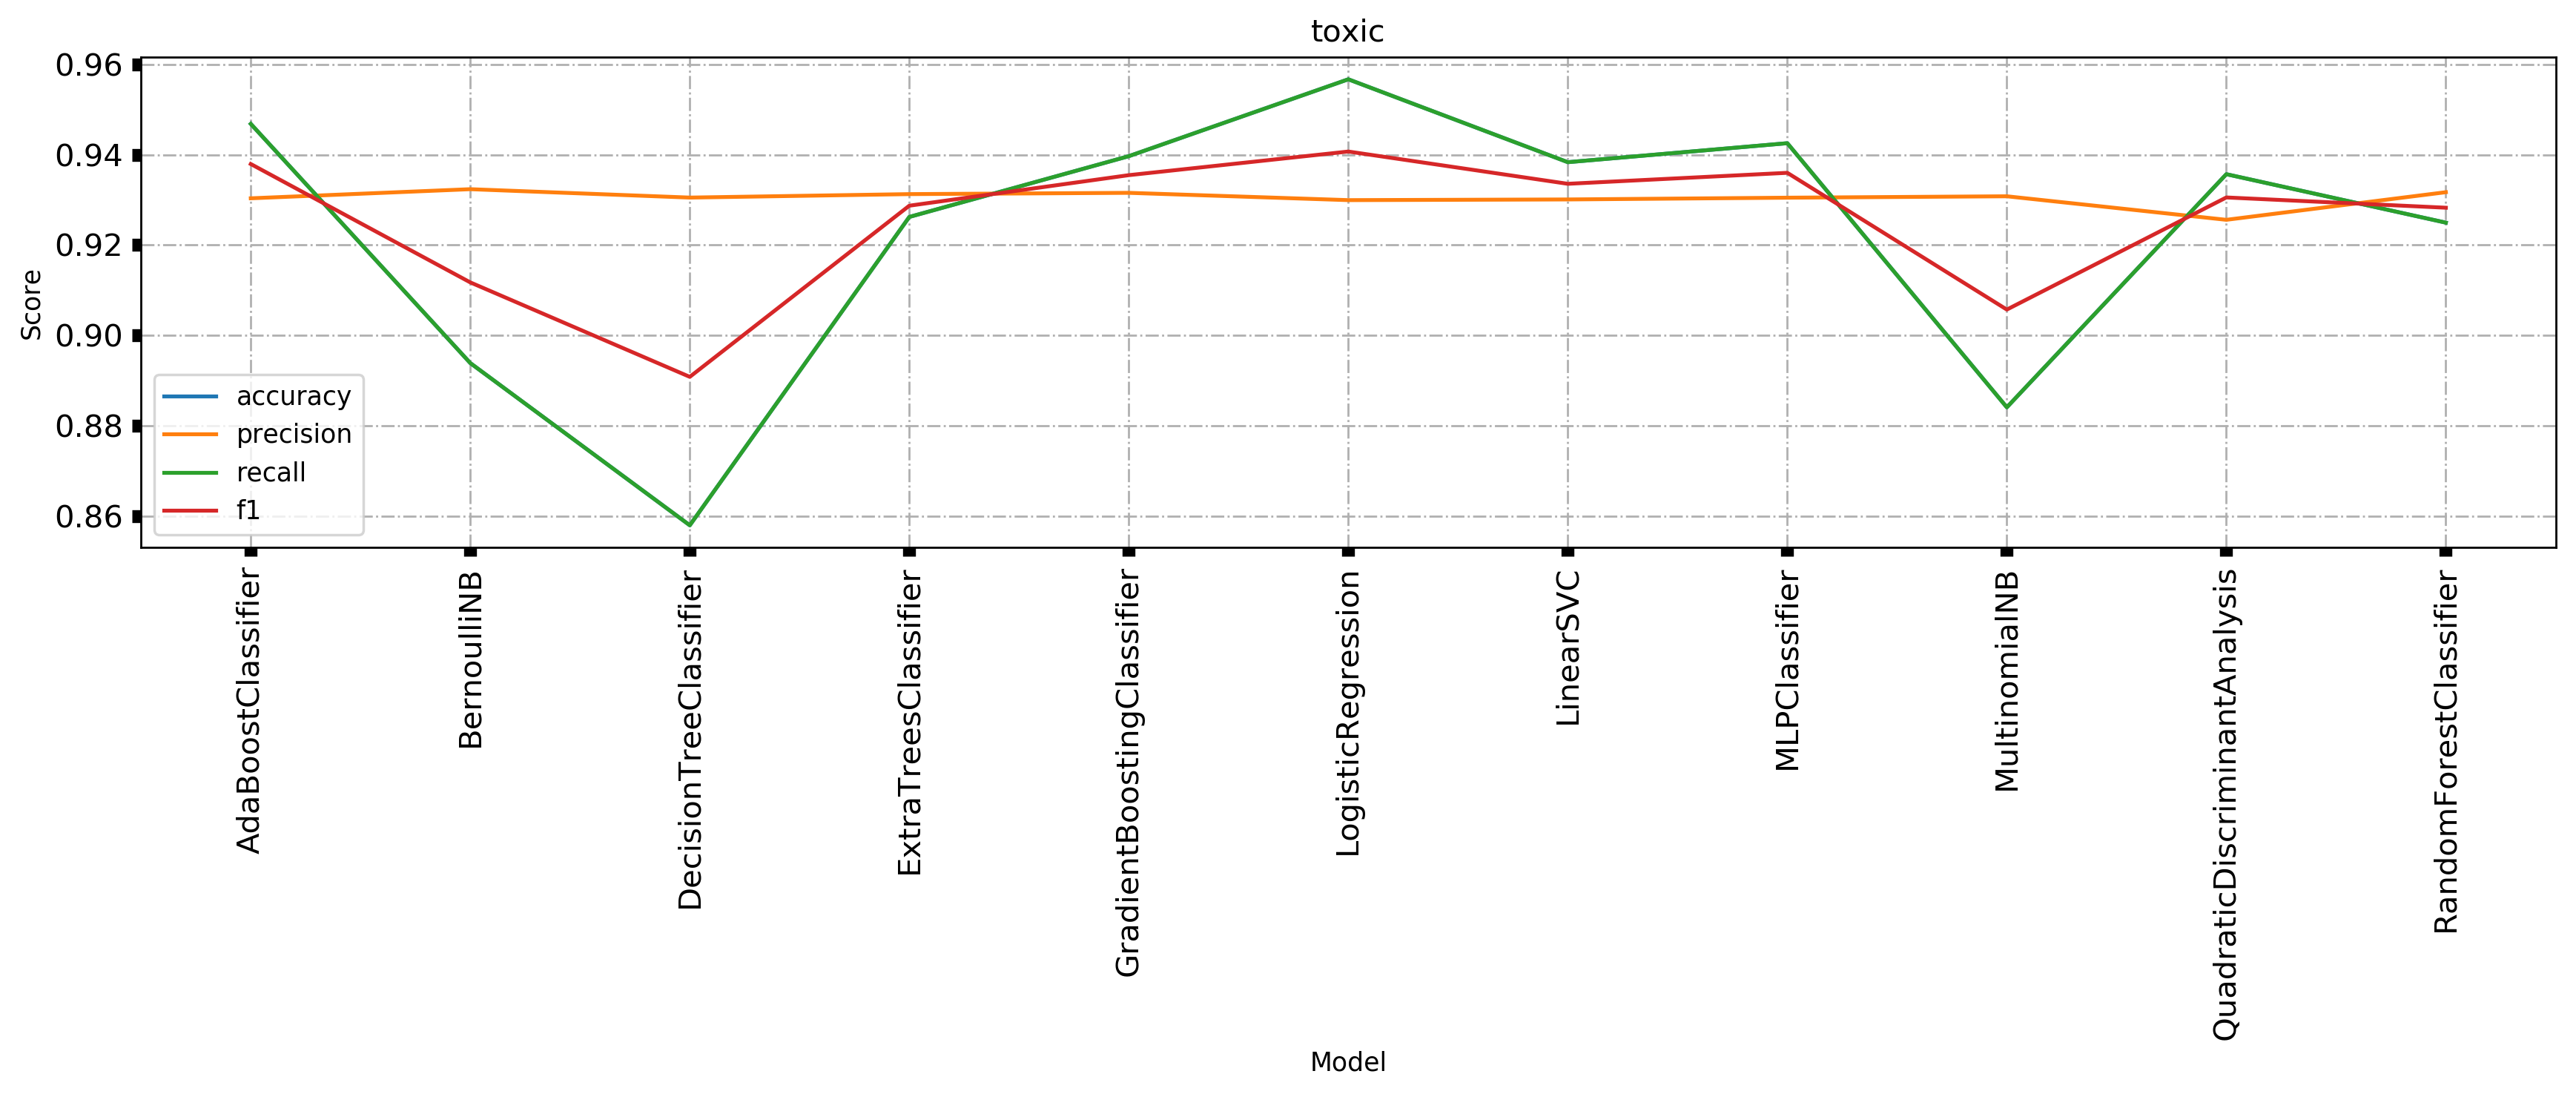

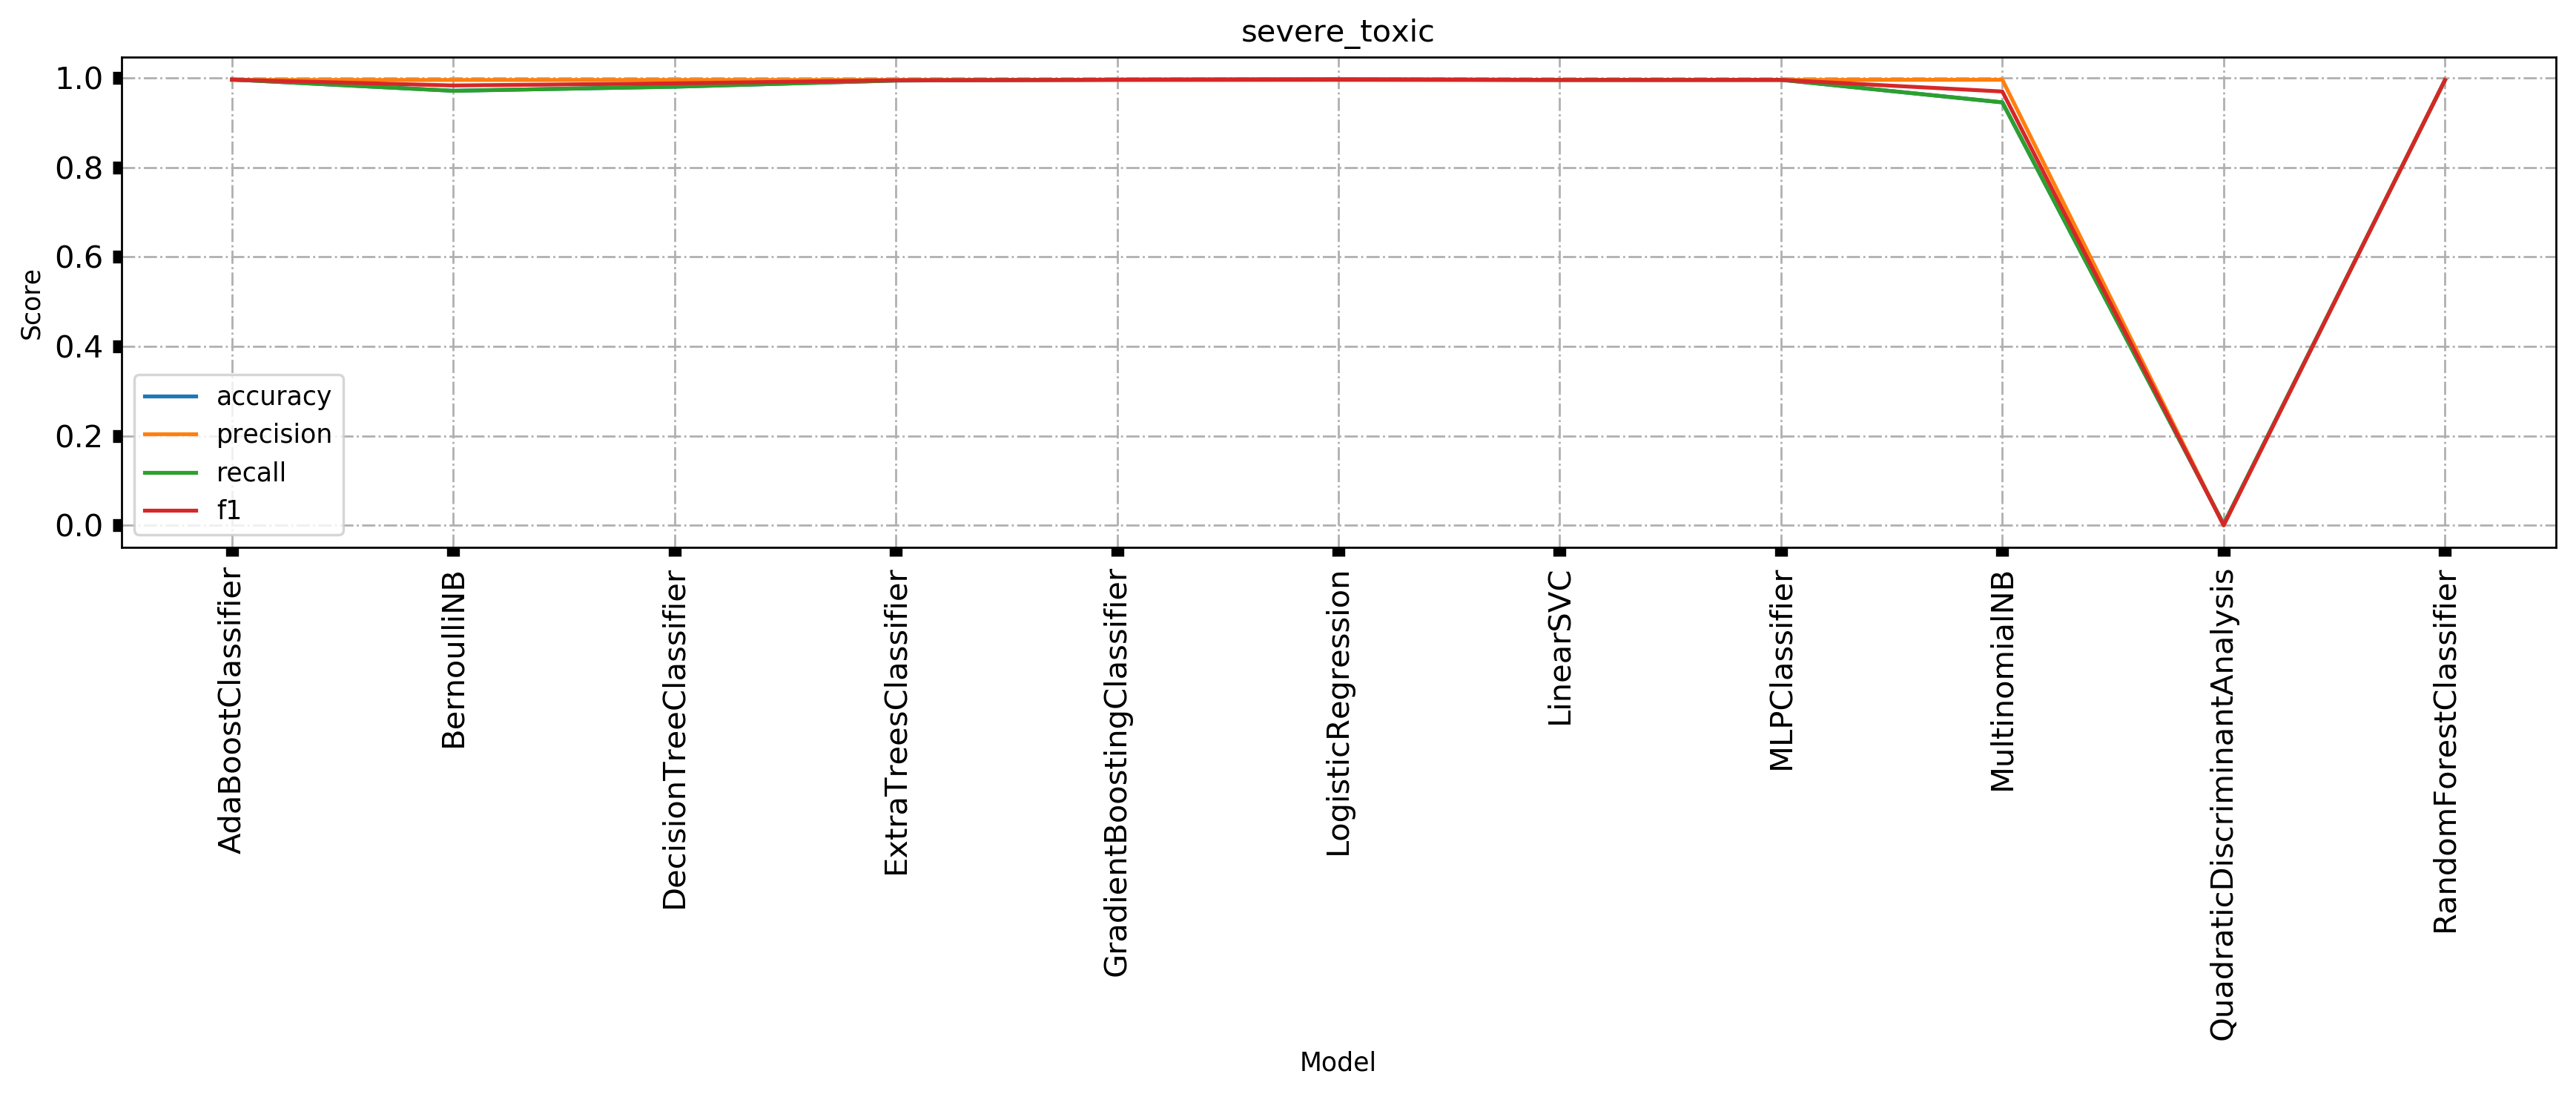

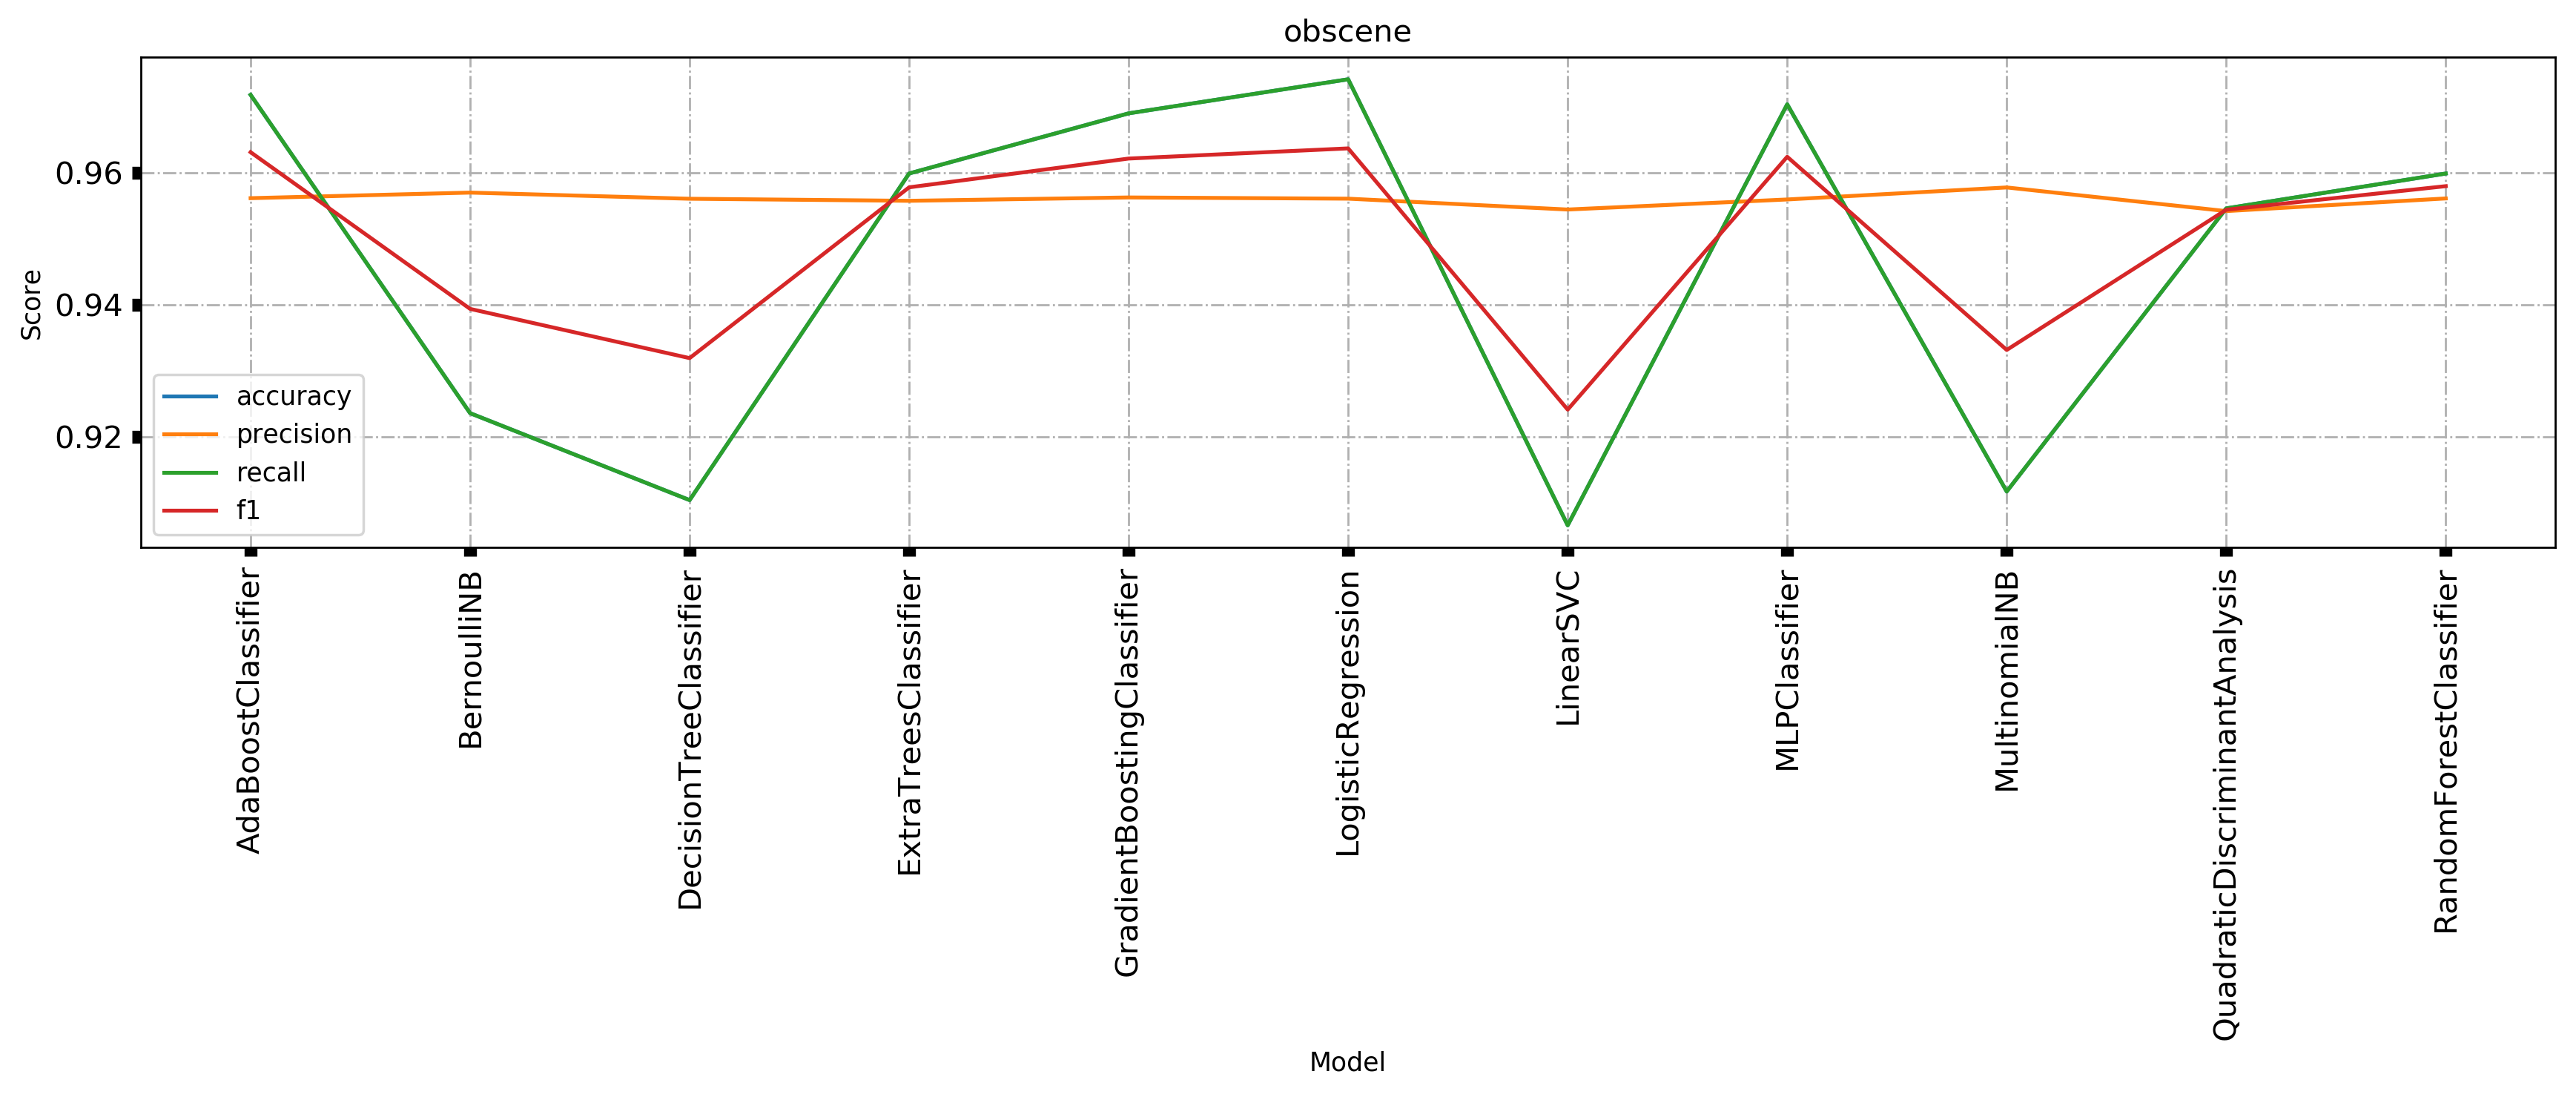

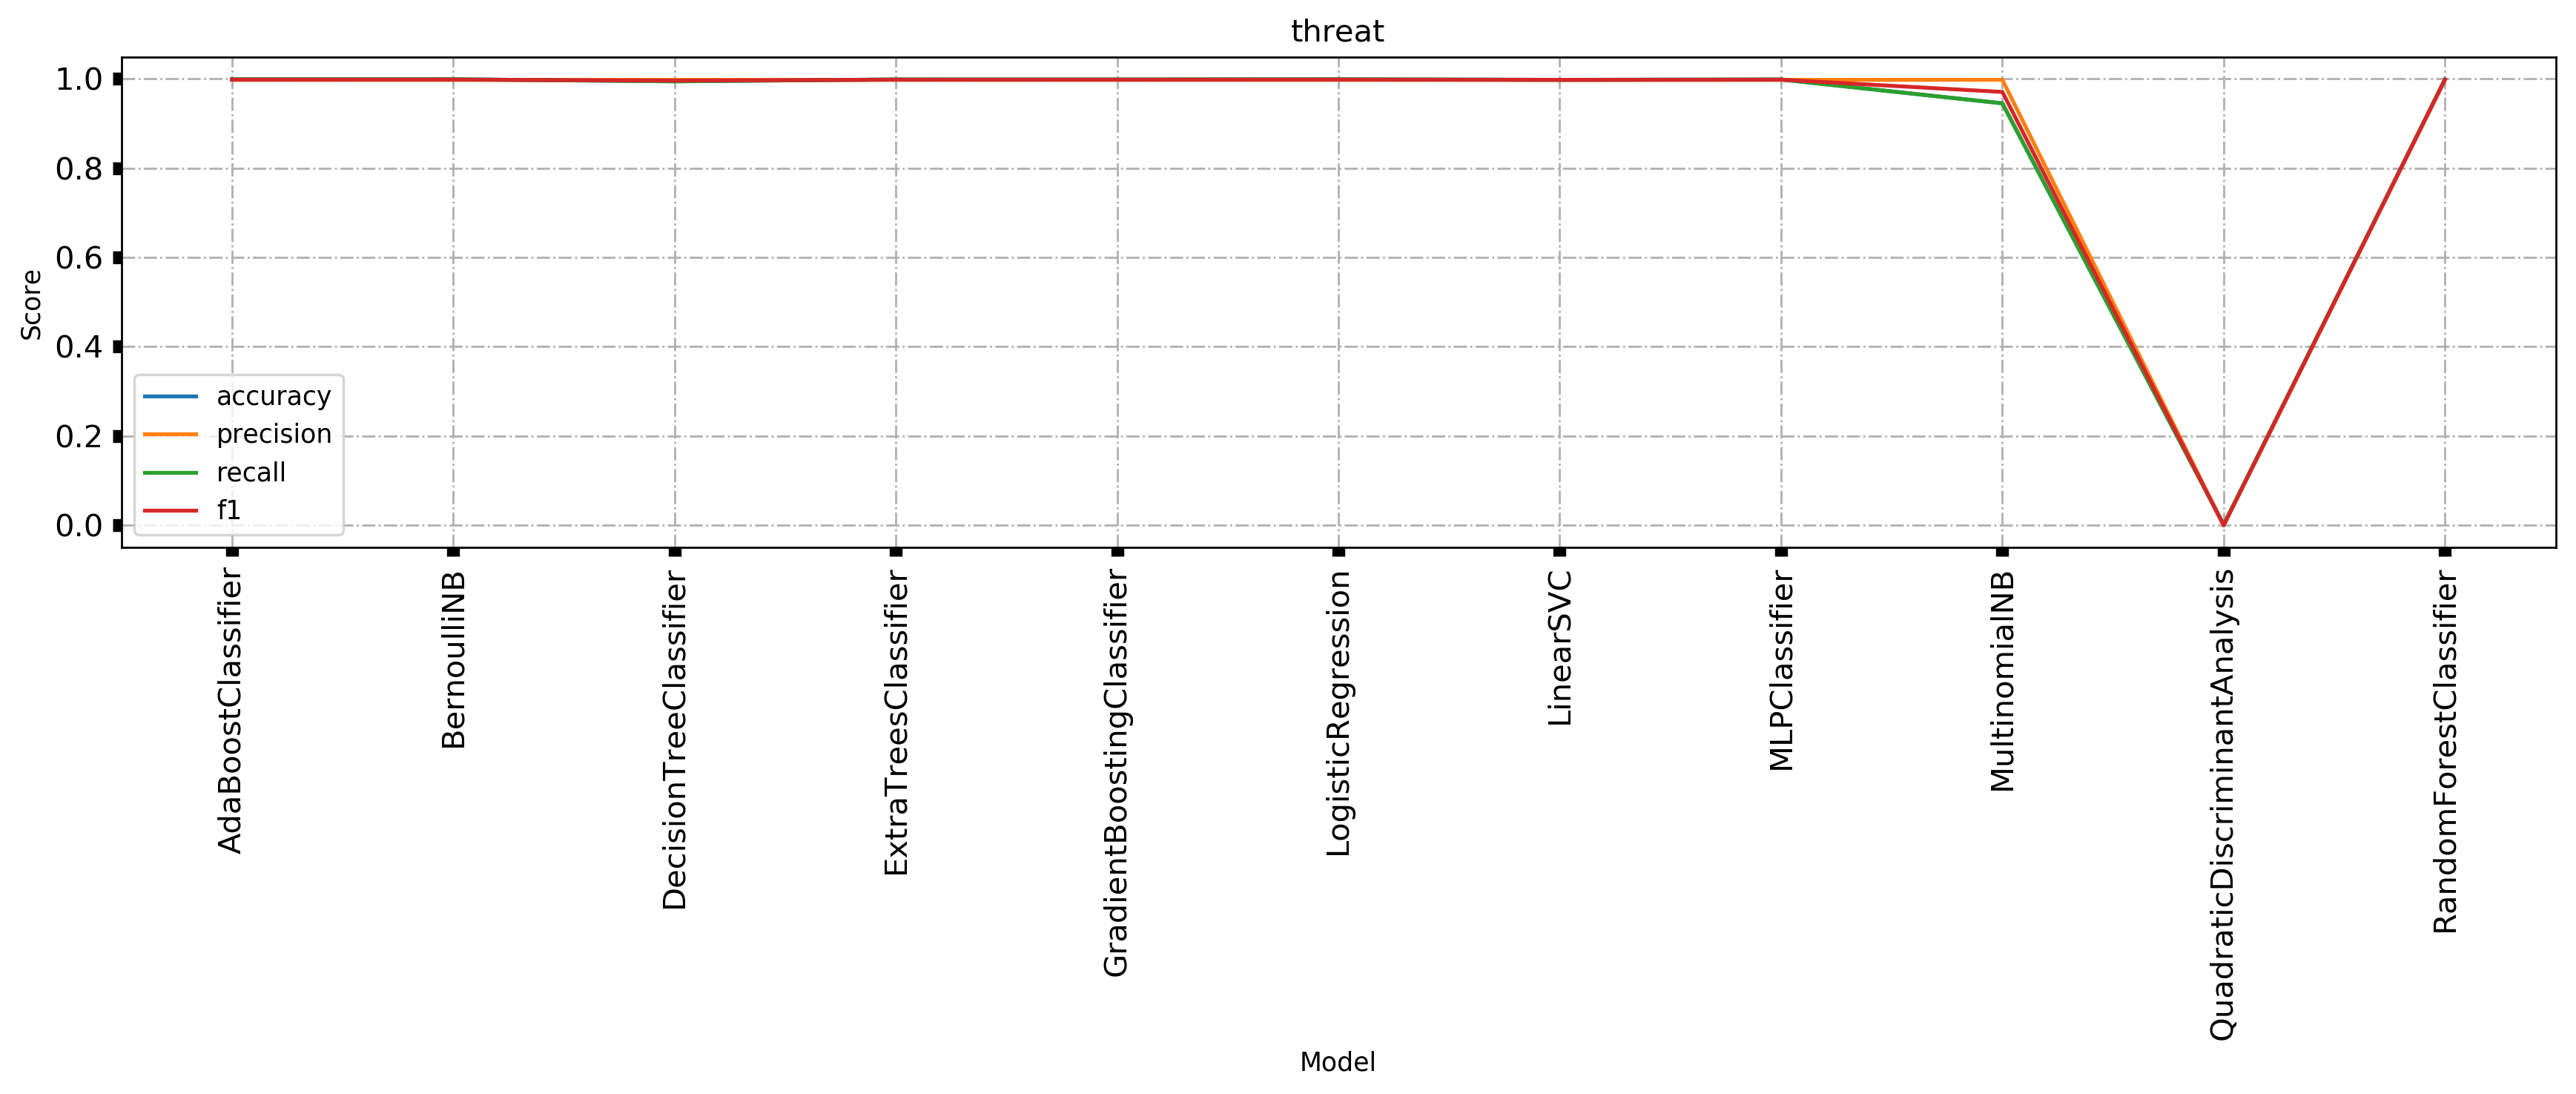

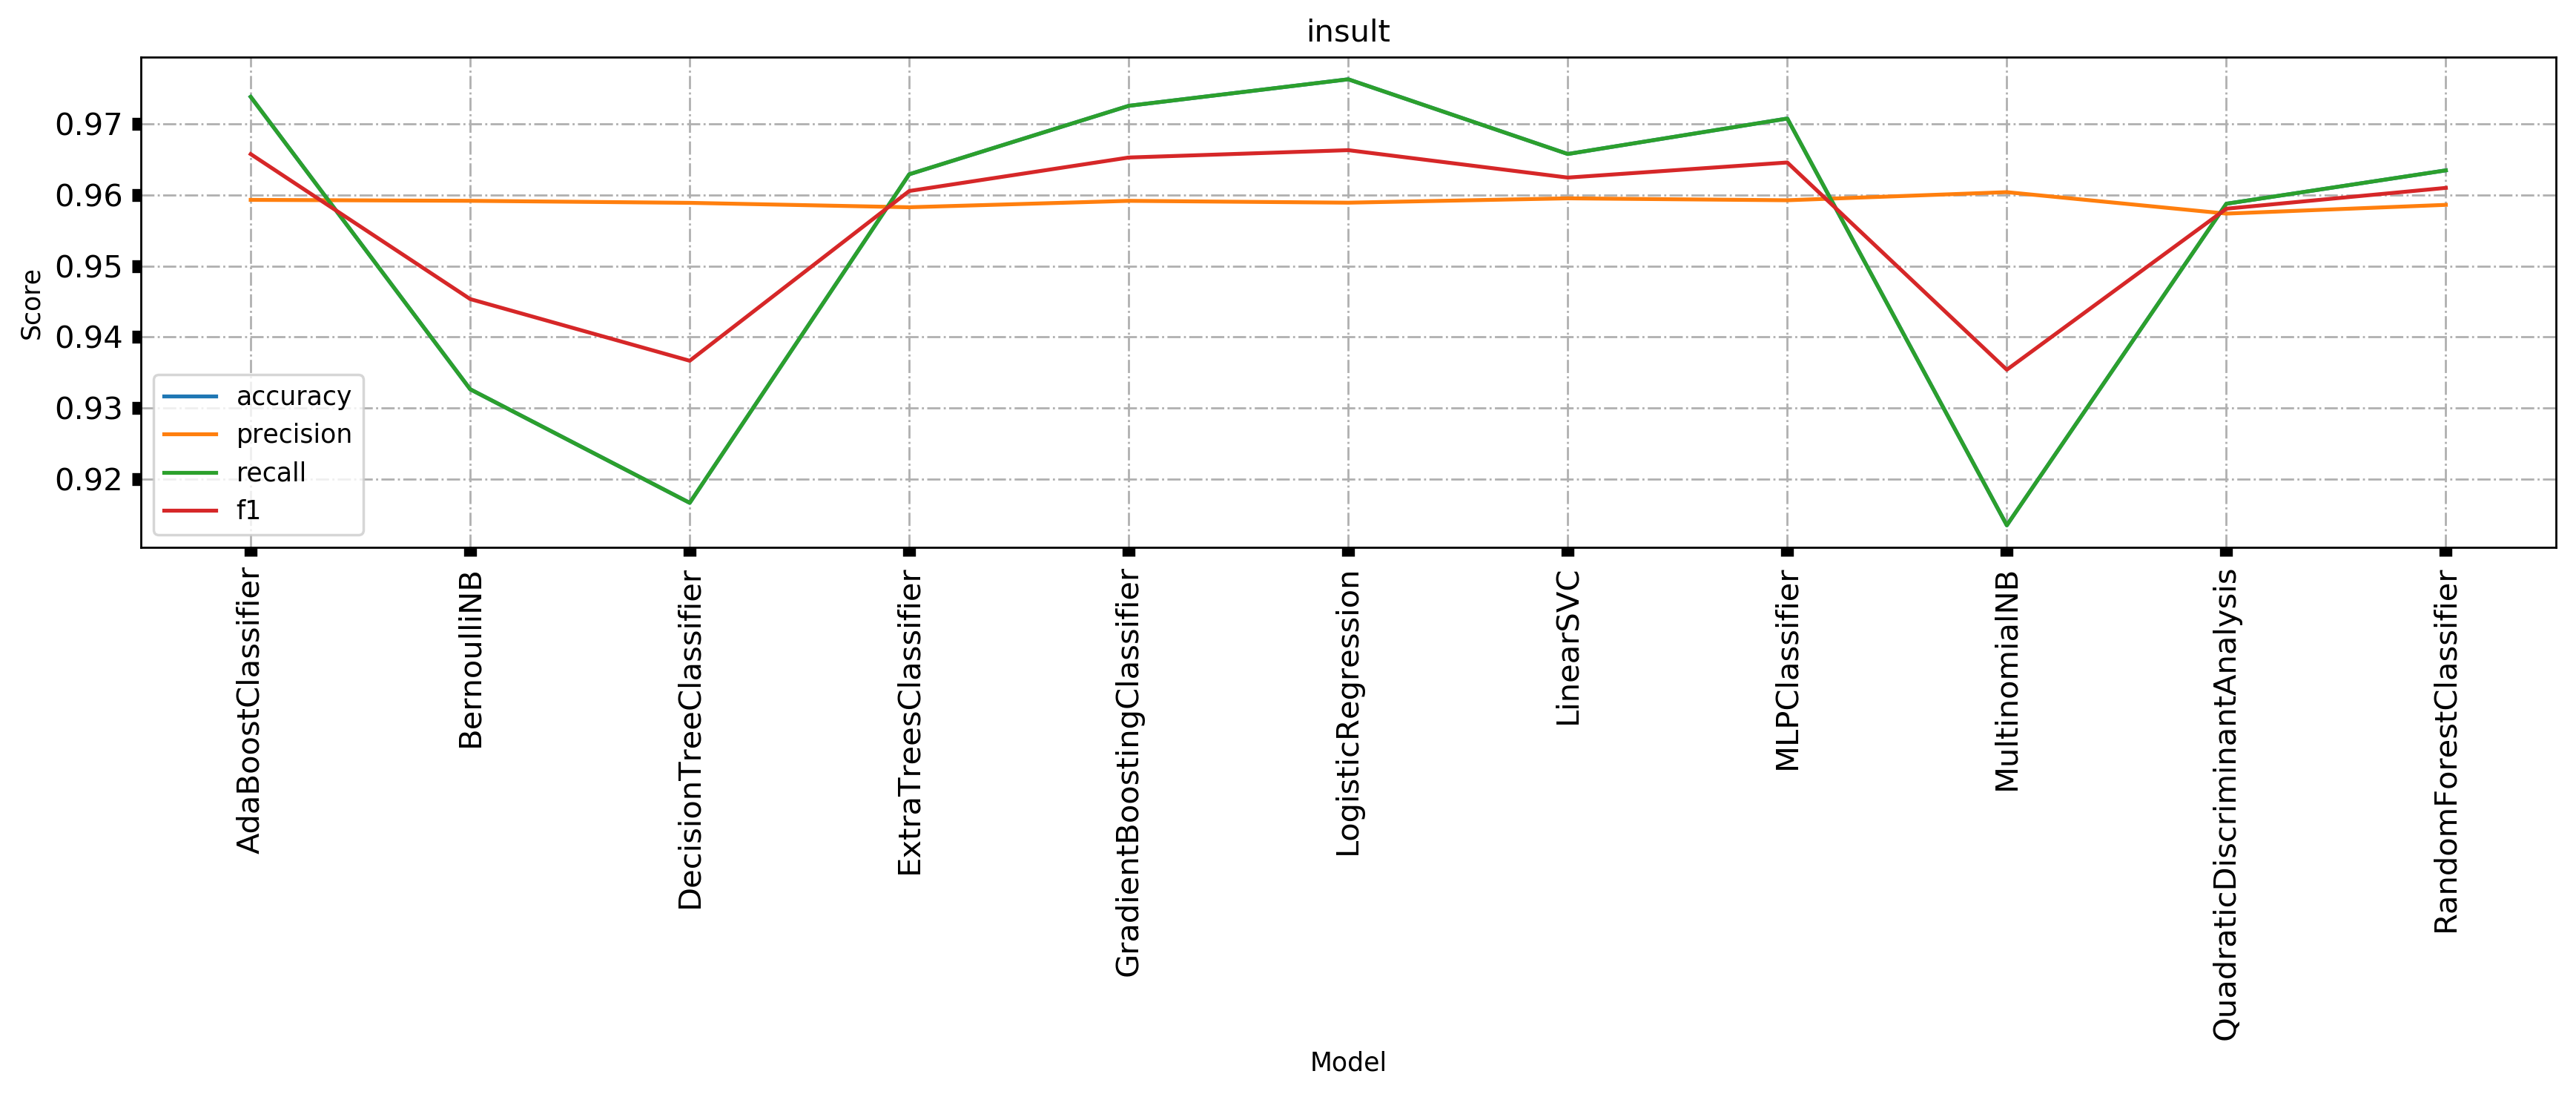

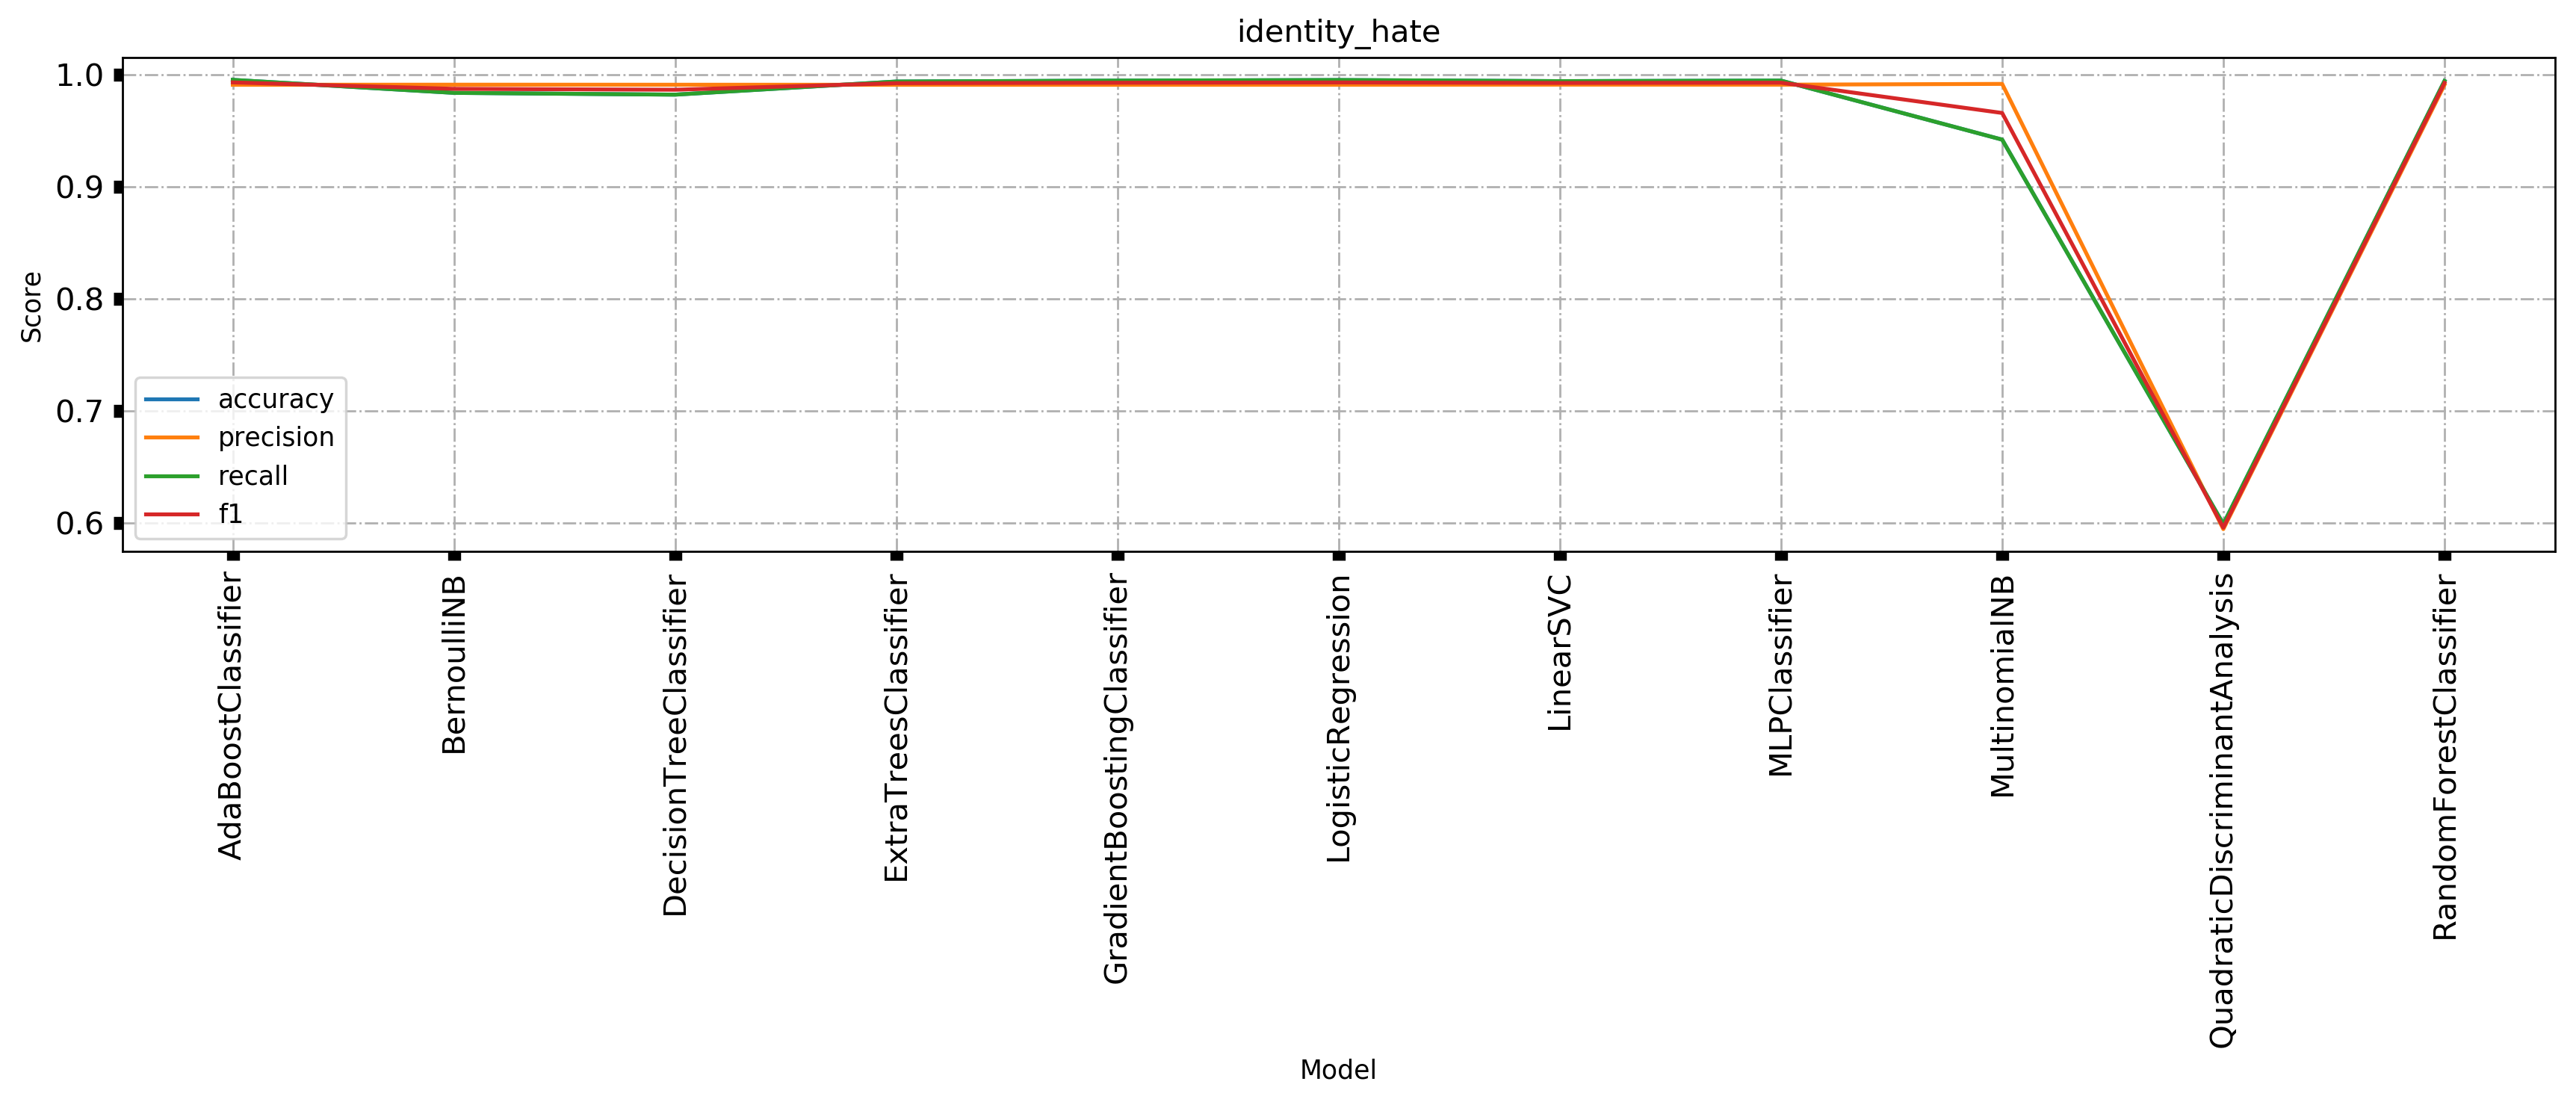

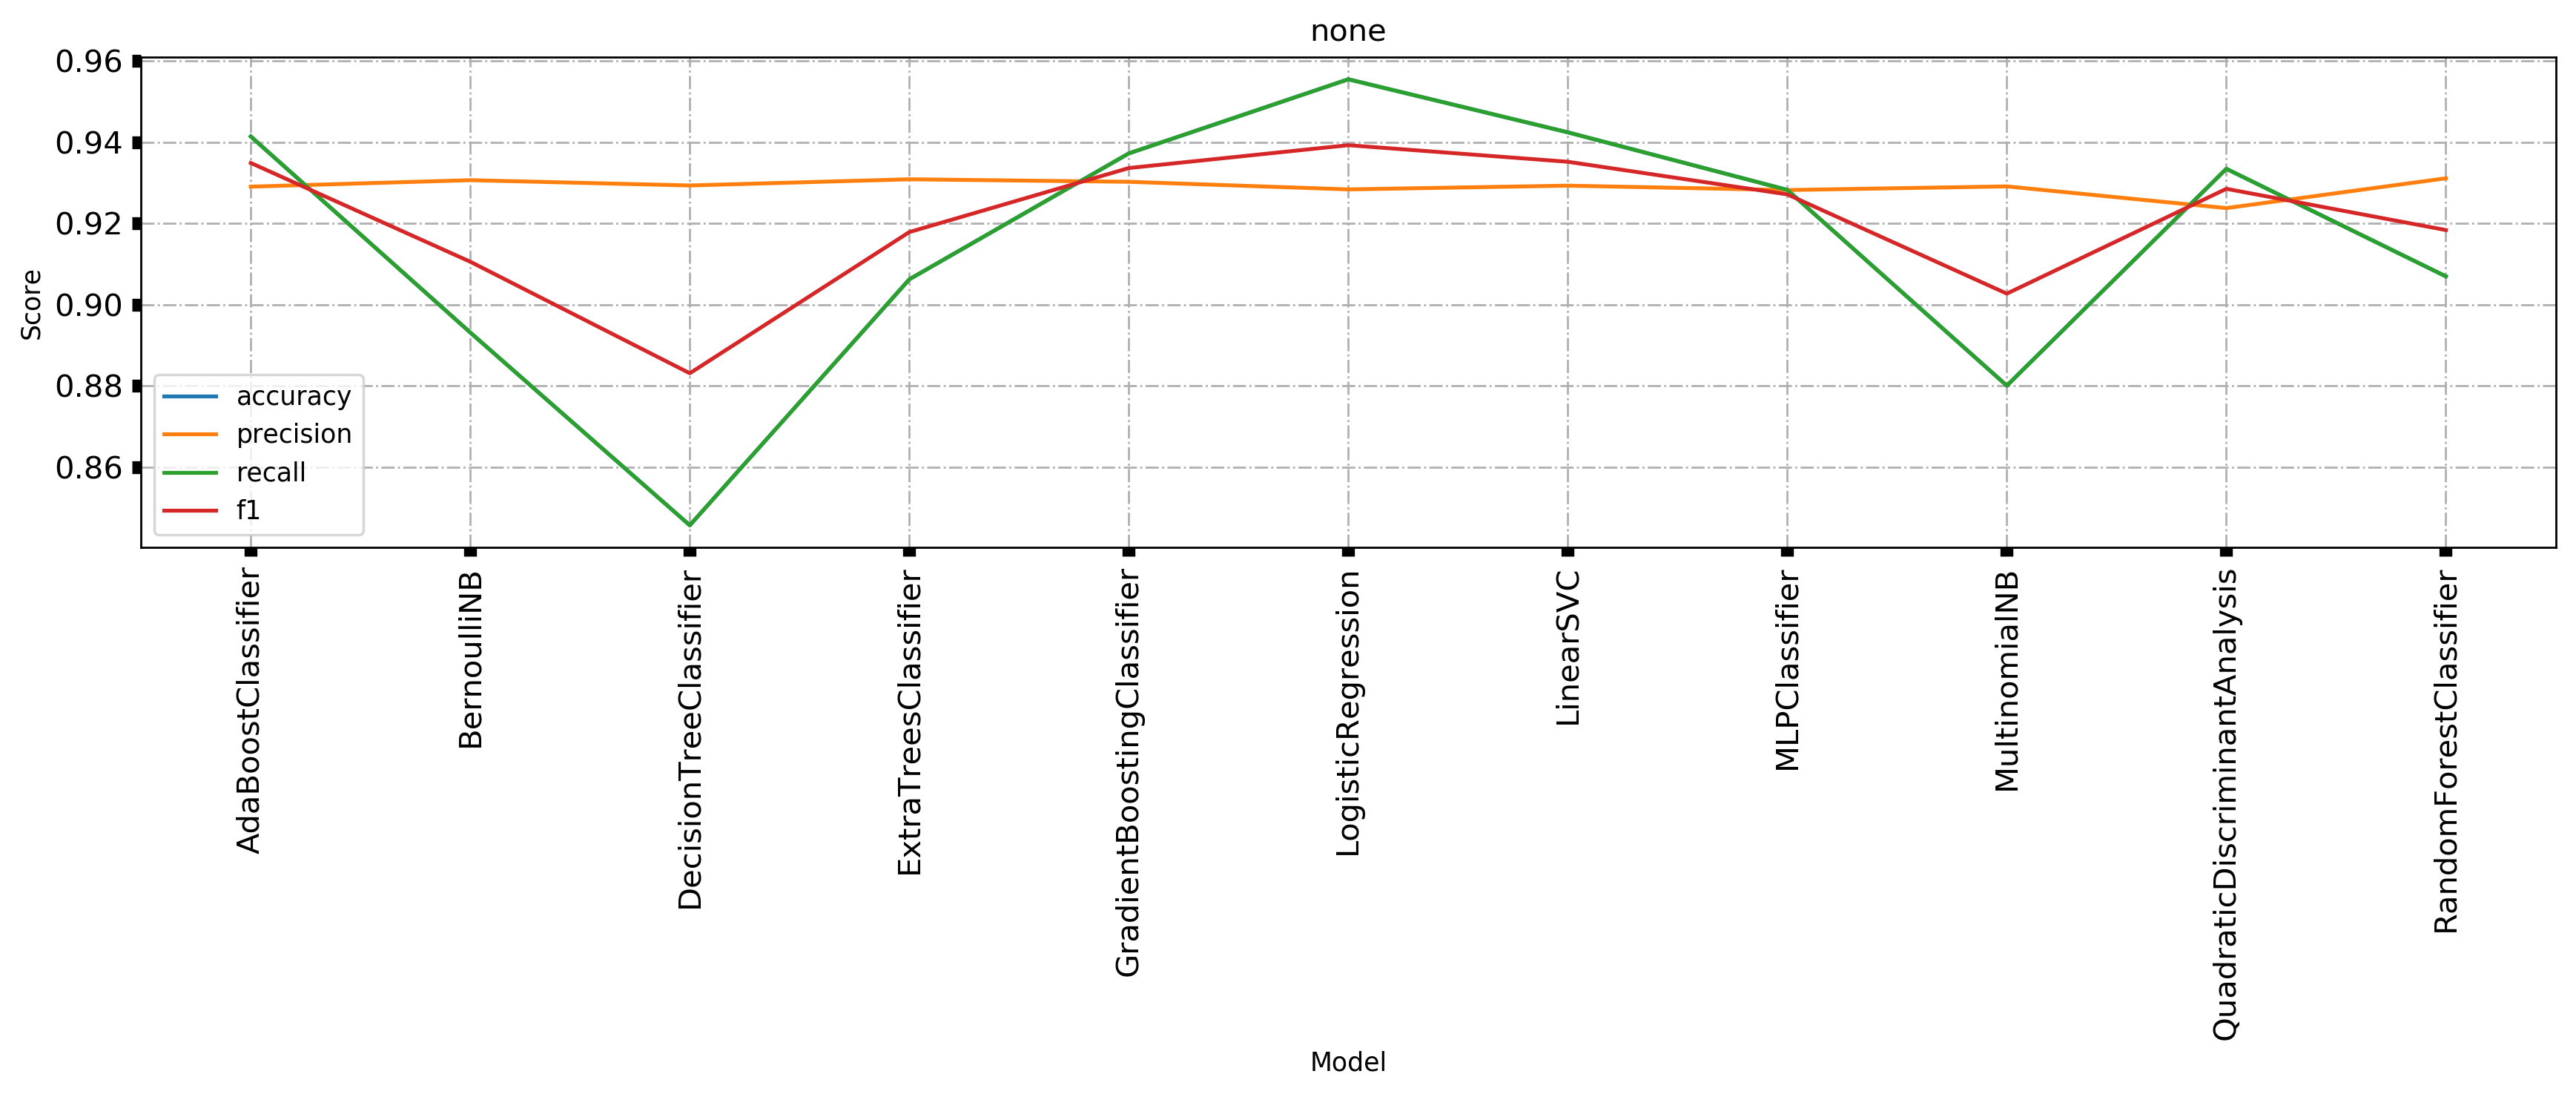

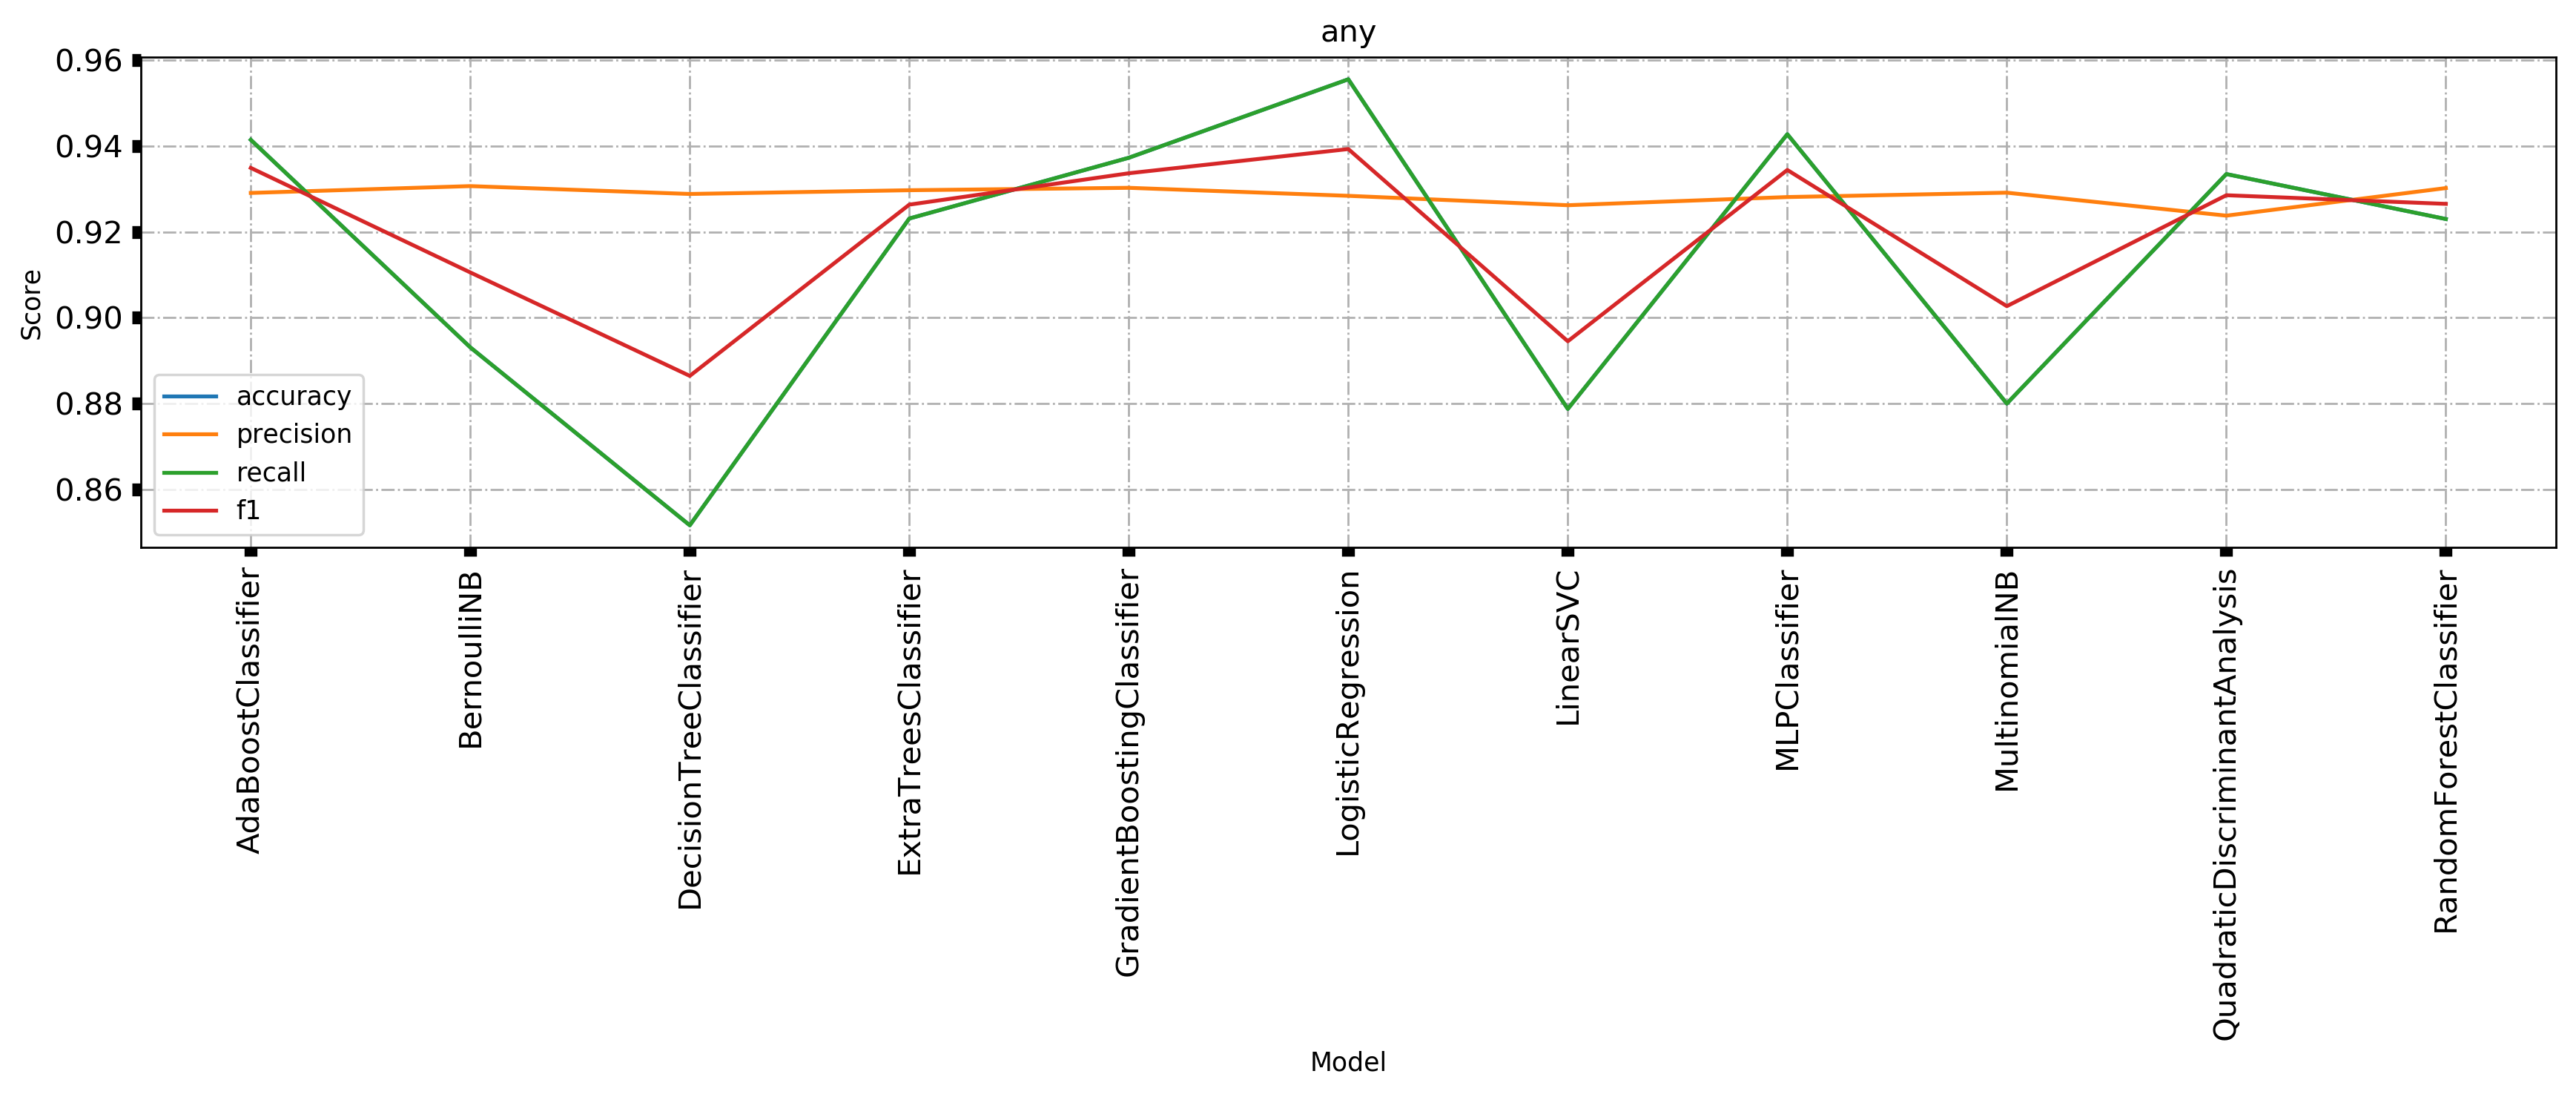

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


labels= ['accuracy', 'precision', 'recall', 'f1']
x = np.array(evaluation['model'])

for item in evaluation_pd:
    evaluation = evaluation_pd[item]
    
    figure(num=None, figsize=(14, 6), dpi=250)
    ax = plt.subplot(111)
    
    for n in range(len(labels)):
        y = evaluation[labels[n]]
        
        plt.plot(x, y, label = labels[n])

    plt.title(item)
    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.legend()
    plt.xlabel('Model')
    plt.ylabel('Score')   
    plt.xticks(rotation=90)
    ax.tick_params(labelsize='large', width=5)
    ax.grid(True, linestyle='-.')
    plt.tight_layout()
    plt.show()
